In [1]:
import sys 
sys.path.append("..")
from src.dataset import Dataset
import pandas as pd
import os
from definitions import get_synthetic_splits
from matplotlib import rc
rc('text', usetex=True)


In [2]:
# # dataset_generator = Dataset("compas", ignore_features=["id", "age_cat", "priors_count.1", "violent_recid"])
# dataset = "adult"
# dataset_generator = Dataset(dataset)
# target = dataset_generator.target
# SAMPLING_METHOD = "class_protected"
# GENERATION_METHOD = "cart"
r'$\bf{Bold}$ Title'
nice_dataset_names = {"adult": r"$\textbf{Adult}$" +" dataset", "german": r"$\textbf{German credit}$" +" dataset", "dutch": r"$\textbf{Dutch census}$" +" dataset", "credit": r"$\textbf{Credit card clients}$" +" dataset"}
sampling_methods = ['class', 'class_protected', 'protected', 'same_class']
sampling_methods_names = ['class', 'class \&\\ protected', 'protected', 'class (ratio)']



In [3]:
# protected_attributes = ["sex"]
# split_dfs, additional_sizes = dataset_generator.split_population(dataset_generator.original_dataframe, protected_attributes)


In [4]:
# split_df_keys, split_df_vals = zip(*split_dfs.items())


# final_augmented_dataset_plots = []
# sampling_methods = ['class', 'class_protected', 'protected', 'same_class']
# sampling_methods_names = ['class', 'class & protected', 'protected', 'class (same)']

# for sampling_method in sampling_methods:
#     augmented_dfs, augmented_dfs_plot = get_synthetic_splits(dataset_generator, split_dfs, generative_method=GENERATION_METHOD, generative_seed=0, return_plot=True, sampling_method=sampling_method)
#     final_augmented_dataset = pd.concat(augmented_dfs)
#     final_augmented_dataset_plot = pd.concat(augmented_dfs_plot)
#     final_augmented_dataset_plot['target_method'] = final_augmented_dataset_plot[target].astype(str) + ' (' + final_augmented_dataset_plot['method'].astype(str) + ')'
#     final_augmented_dataset_plots.append(final_augmented_dataset_plot)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap

# Function to format y-axis labels
def format_ytick(x, pos):
    if x >= 1000:
        return '{:1.0f}k'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)


datasets = list(nice_dataset_names.keys())


def get_fad(datasets, sampling_methods):

    final_augmented_dataset_plots_all =[]
    for dd, dataset in enumerate(datasets):
        
        dataset_generator = Dataset(dataset)
        target = dataset_generator.target
        protected_attributes = ["sex"]
        split_dfs, additional_sizes = dataset_generator.split_population(dataset_generator.original_dataframe, protected_attributes)

        # Apply the formatter to the y-axis
        # Assuming you have two different DataFrames: df1 and df2
        # Replace df1 and df2 with your actual DataFrame names
        final_augmented_dataset_plots = []
        sampling_methods = ['class', 'class_protected', 'protected', 'same_class']
        sampling_methods_names = ['class', 'class & protected', 'protected', 'class (same)']

        for sampling_method in sampling_methods:
            augmented_dfs, augmented_dfs_plot = get_synthetic_splits(dataset_generator, split_dfs, generative_method="cart", generative_seed=0, return_plot=True, sampling_method=sampling_method)
            final_augmented_dataset = pd.concat(augmented_dfs)
            final_augmented_dataset_plot = pd.concat(augmented_dfs_plot)
            final_augmented_dataset_plot['target_method'] = final_augmented_dataset_plot[target].astype(str) + ' (' + final_augmented_dataset_plot['method'].astype(str) + ')'
            final_augmented_dataset_plots.append(final_augmented_dataset_plot)

        final_augmented_dataset_plots_all.append(final_augmented_dataset_plots)
    return final_augmented_dataset_plots_all



In [6]:
final_augmented_dataset_plots_all = get_fad(datasets, sampling_methods)

Dataset adult_fnlwgt_educational-num has ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'] categorical and ['age', 'capital-gain', 'capital-loss', 'hours-per-week'] numerical columns.
		 Synthetic samples cart class


/home/panagiotou/Desktop/FairAugment/util/../src/dataset.py:691: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for attr_values, indices in dataframe.groupby(protected_attributes).groups.items():


		 Synthetic samples cart class_protected
		 Synthetic samples cart protected
		 Synthetic samples cart same_class
Dataset german has ['checking-account', 'credit-history', 'purpose', 'savings-account', 'employment-since', 'other-debtors', 'property', 'other-installment', 'housing', 'job', 'telephone', 'foreign-worker', 'sex', 'marital-status'] categorical and ['duration', 'credit-amount', 'installment-rate', 'residence-since', 'age', 'existing-credits', 'numner-people-provide-maintenance-for'] numerical columns.
		 Synthetic samples cart class


/home/panagiotou/Desktop/FairAugment/util/../src/dataset.py:691: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for attr_values, indices in dataframe.groupby(protected_attributes).groups.items():


		 Synthetic samples cart class_protected
		 Synthetic samples cart protected
		 Synthetic samples cart same_class
Dataset dutch has ['sex', 'age', 'household_position', 'household_size', 'prev_residence_place', 'citizenship', 'country_birth', 'edu_level', 'economic_status', 'cur_eco_activity', 'marital_status'] categorical and [] numerical columns.
		 Synthetic samples cart class


/home/panagiotou/Desktop/FairAugment/util/../src/dataset.py:691: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for attr_values, indices in dataframe.groupby(protected_attributes).groups.items():


		 Synthetic samples cart class_protected
		 Synthetic samples cart protected
		 Synthetic samples cart same_class
Dataset credit has ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'] categorical and ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'] numerical columns.
		 Synthetic samples cart class
		 Synthetic samples cart class_protected
		 Synthetic samples cart protected
		 Synthetic samples cart same_class


In [7]:
final_augmented_dataset_plots_all[0][0]["target_method"]

4             0 (real)
5             0 (real)
6             0 (real)
8             1 (real)
12            0 (real)
             ...      
11444    1 (synthetic)
11445    1 (synthetic)
11446    1 (synthetic)
11447    1 (synthetic)
11448    1 (synthetic)
Name: target_method, Length: 68028, dtype: object

Dataset adult_fnlwgt_educational-num has ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'] categorical and ['age', 'capital-gain', 'capital-loss', 'hours-per-week'] numerical columns.


/tmp/ipykernel_9881/2916003671.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfo_subgroup_counts = dfo.groupby(['sex', target]).size().reset_index(name='count')


Dataset german has ['checking-account', 'credit-history', 'purpose', 'savings-account', 'employment-since', 'other-debtors', 'property', 'other-installment', 'housing', 'job', 'telephone', 'foreign-worker', 'sex', 'marital-status'] categorical and ['duration', 'credit-amount', 'installment-rate', 'residence-since', 'age', 'existing-credits', 'numner-people-provide-maintenance-for'] numerical columns.


/tmp/ipykernel_9881/2916003671.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfo_subgroup_counts = dfo.groupby(['sex', target]).size().reset_index(name='count')
/tmp/ipykernel_9881/2916003671.py:33: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dfo['sex'] = dfo['sex'].replace({'female': 'Female', 'male': 'Male'})


Dataset dutch has ['sex', 'age', 'household_position', 'household_size', 'prev_residence_place', 'citizenship', 'country_birth', 'edu_level', 'economic_status', 'cur_eco_activity', 'marital_status'] categorical and [] numerical columns.


/tmp/ipykernel_9881/2916003671.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfo_subgroup_counts = dfo.groupby(['sex', target]).size().reset_index(name='count')
/tmp/ipykernel_9881/2916003671.py:33: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dfo['sex'] = dfo['sex'].replace({'female': 'Female', 'male': 'Male'})


Dataset credit has ['sex', 'education', 'marriage', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'] categorical and ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'] numerical columns.


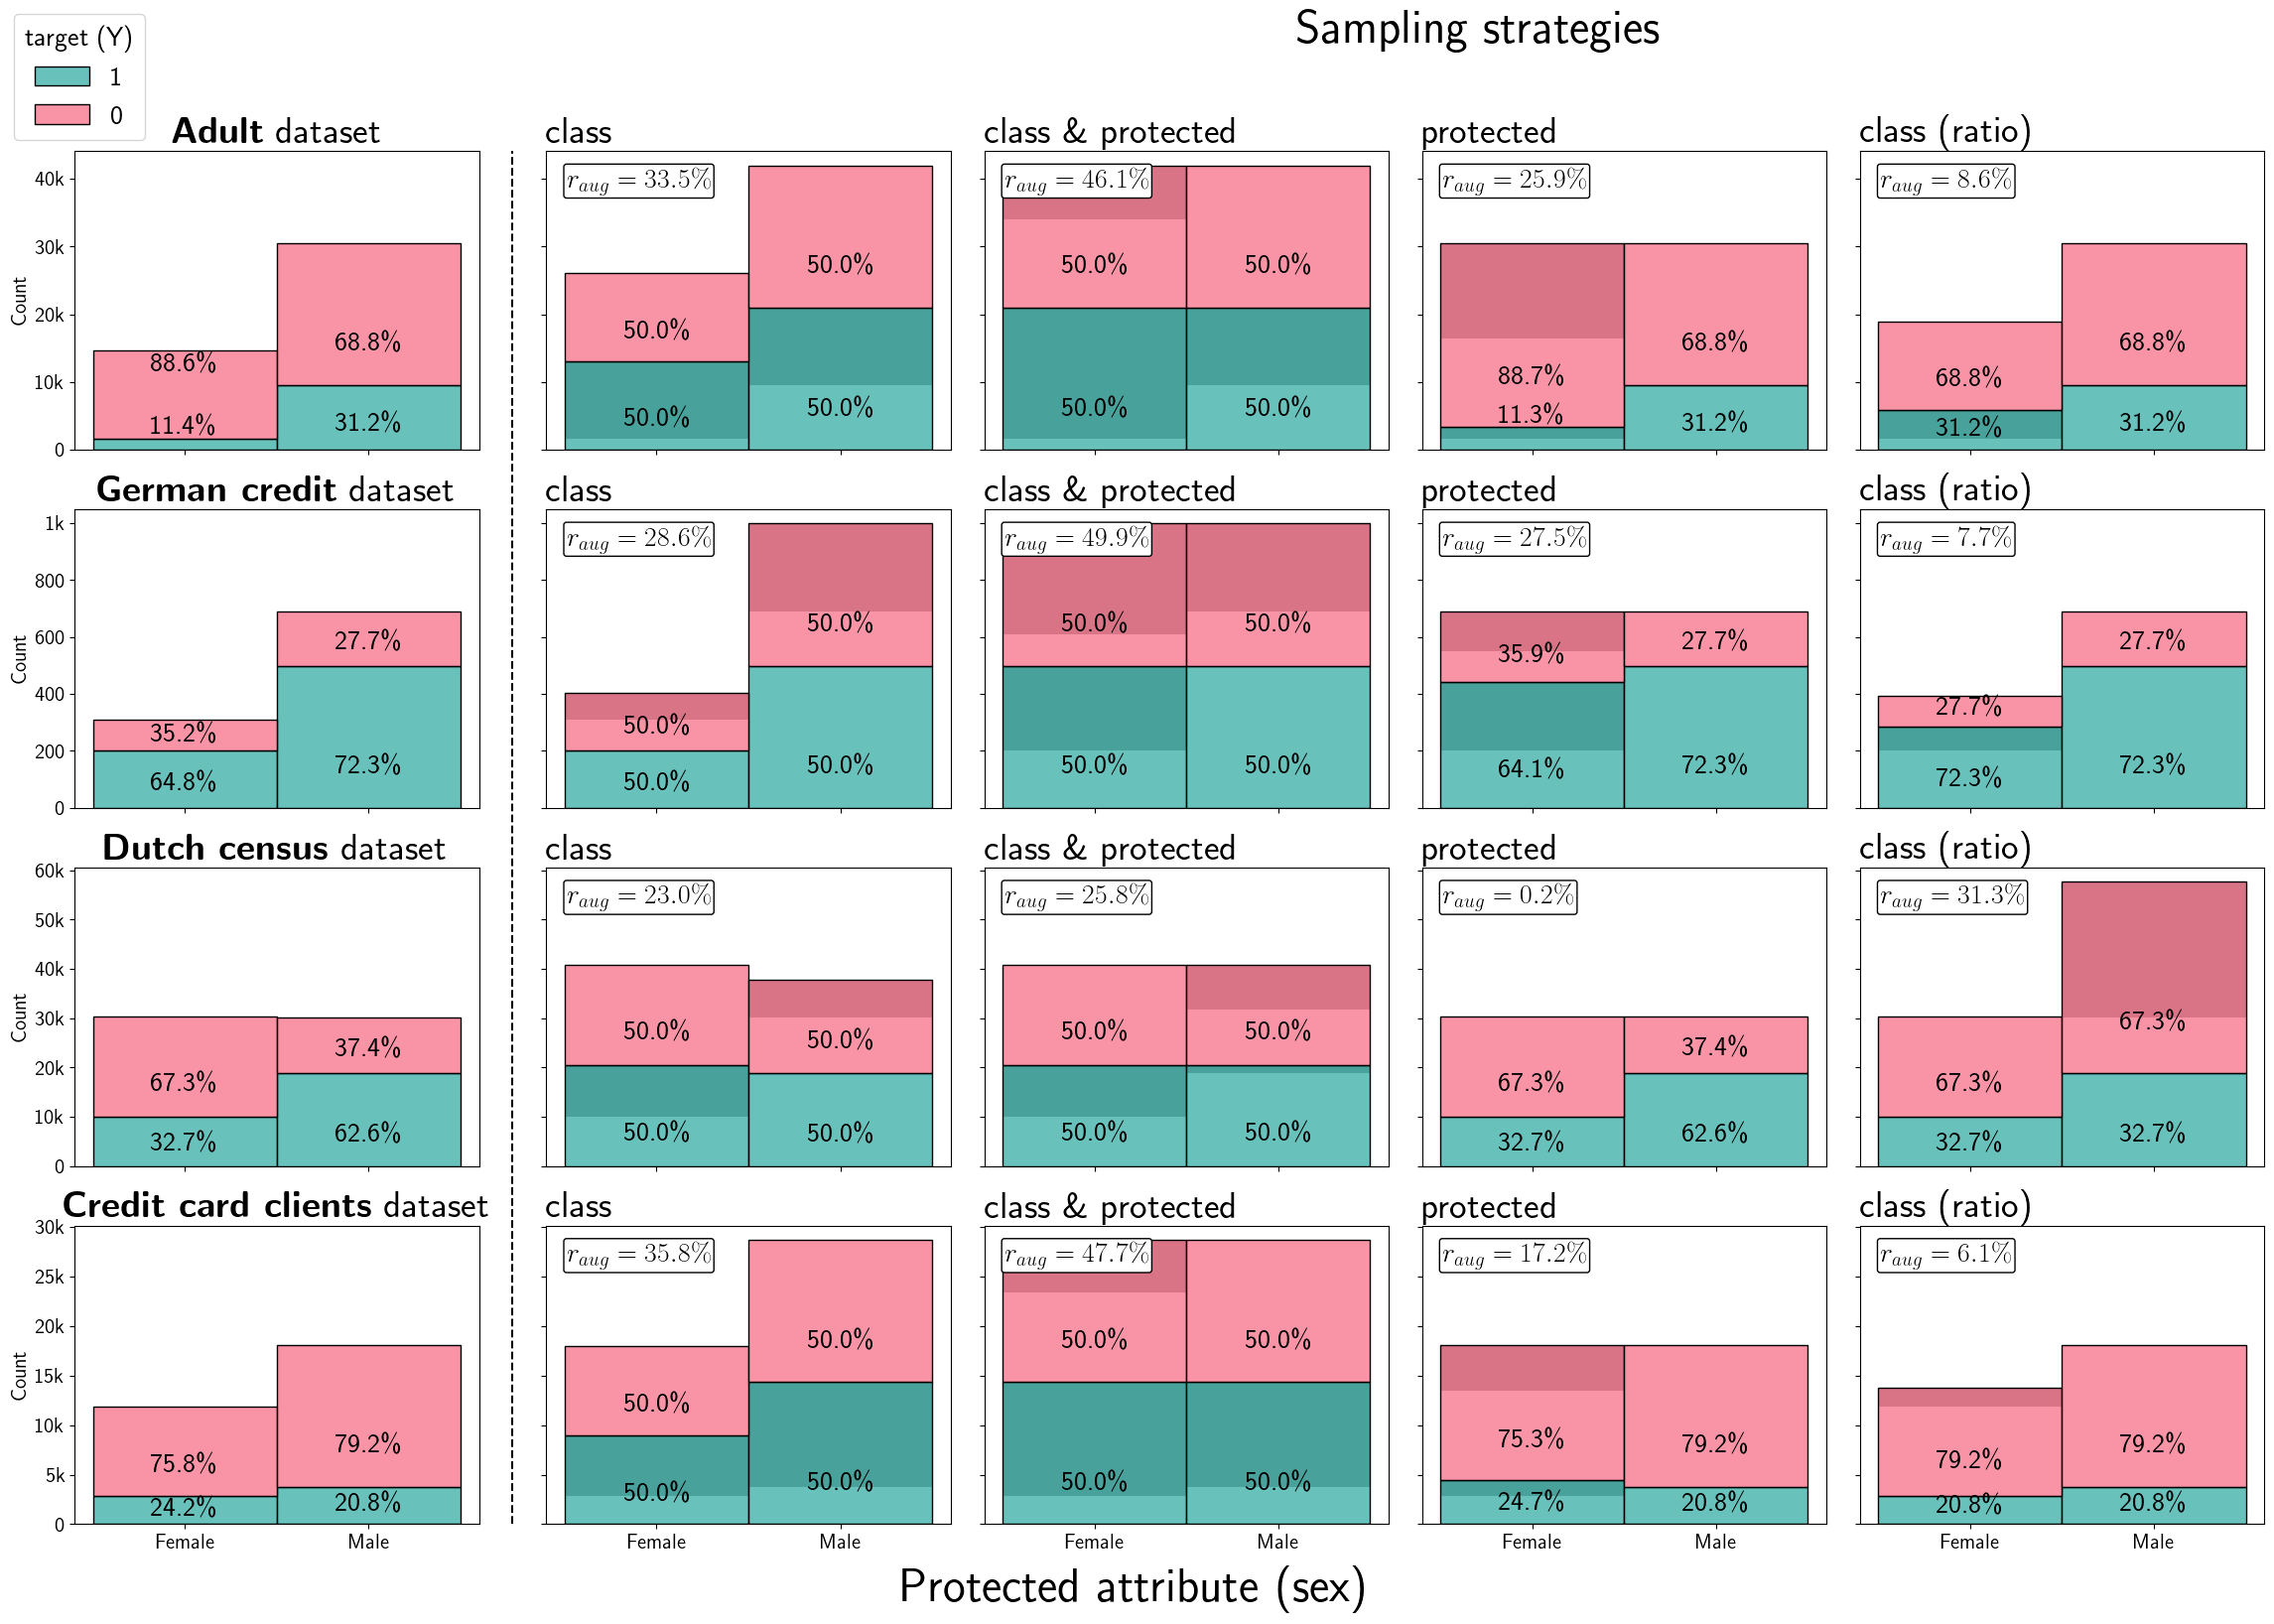

In [8]:
def create_plot(datasets, sampling_methods, final_augmented_dataset_plots_all, sampling_methods_names, min_under):
    fig, axess = plt.subplots(nrows=len(datasets), ncols=2 + len(sampling_methods), figsize=(23, 16), sharex='col', sharey='row', gridspec_kw={'width_ratios': [1, 0.0] + [1]*len(sampling_methods)})

    order = ['0 (synthetic)', '0 (real)', '1 (synthetic)', '1 (real)']
    order_index_map = {item: idx for idx, item in enumerate(order)}

    # Define the palette using Seaborn's color palette generator
    palette = sns.color_palette("husl", 2)  # Using 'husl' palette with 2 colors

    # synthetic_palette_order = [item for color in palette for item in [(color[0], color[1], color[2]), (0, 0, 0)]]
    synthetic_palette_order = [(1, 1, 1), (0, 0, 0), (1, 1, 1), (0, 0, 0)]

    order_color_dict = {k: v for k, v in zip(order, synthetic_palette_order)}


    for dd, dataset in enumerate(datasets):
        
        dataset_generator = Dataset(dataset)
        target = dataset_generator.target
        axes = axess[dd, :]
        
        final_augmented_dataset_plots = final_augmented_dataset_plots_all[dd]
        # Set up the plot with two subplots in two columns



        gender_order = ['Female', 'Male']  # Adjust as per your actual category order

        dfo = dataset_generator.original_dataframe

        dfo_subgroup_counts = dfo.groupby(['sex', target]).size().reset_index(name='count')

        dfo['sex'] = dfo['sex'].replace({'female': 'Female', 'male': 'Male'})
        dfo = dfo.rename(columns={target: 'target (Y)'})

        # Plot for df1
        axxx = sns.histplot(data=dfo, x='sex', hue='target (Y)', palette=palette, multiple="stack", ax=axes[0], discrete = True, legend=False)
        axes[0].set_title(nice_dataset_names[dataset], fontsize=27)
        axes[0].set_ylabel('Count', fontsize=15)

        axes[0].set_xlabel('')


        if dd==0:
            fig.legend(handles=axxx.containers, labels=['1', '0'], loc = "upper left", title='target (Y)', fontsize=20, title_fontsize=20)




        for i, final_data in enumerate(final_augmented_dataset_plots):  
            final_data_subgroup_counts = final_data.groupby(['sex', target]).size().reset_index(name='count')

            diff_counts = final_data_subgroup_counts.copy()
            diff_counts['count'] = final_data_subgroup_counts['count'] - dfo_subgroup_counts['count']
            r_aug = diff_counts['count'].sum().sum() / final_data_subgroup_counts['count'].sum().sum() * 100
            final_data['sex'] = final_data['sex'].replace({'female': 'Female', 'male': 'Male'})
            final_data = final_data.rename(columns={target: 'target (Y)'})

            uniq = final_data['target_method'].unique()

            hue_order = sorted(uniq, key=lambda x: order_index_map.get(x, float('inf')))

            synthetic_palette = [order_color_dict[hu] for hu in hue_order]



            sns.histplot(data=final_data, x='sex', hue='target_method', hue_order=hue_order, 
                         palette=synthetic_palette, multiple="stack", ax=axes[i+2], discrete = True, legend=False)
            
            sns.histplot(data=final_data, x='sex', hue='target (Y)', palette=palette, multiple="stack", ax=axes[i+2], discrete = True, legend=False)

            axes[i+2].set_title('{}'.format(sampling_methods_names[i]), fontsize=27, loc='left')
            axes[i+2].set_xlabel('')

            # These are the properties for the text box
            props = dict(boxstyle='round,pad=0.1', facecolor='white', edgecolor='black')

            # Place the annotation box
            axes[i+2].annotate("$r_{{aug}}={:.1f}\%$".format(r_aug), xy=(0.05, 0.9), xycoords='axes fraction',
                        bbox=props, verticalalignment='center', fontsize=20)

        # Adjust layout

        axes[1].axis('off') 

        for ak, ax in enumerate(axes):
            for kk, bar in enumerate(ax.patches):
                total_height = sum(p.get_height() for p in ax.patches if p.get_x() == bar.get_x())
                if ak:
                    total_height = total_height/2

                if bar.get_facecolor()[:3] == (0.0, 0.0, 0.0):      
                    bar.set_facecolor((0.0, 0.0, 0.0, 0.0))
                    bar.set_linewidth(0)

                    continue

                if bar.get_facecolor()[:3] == (1.0, 1.0, 1.0):      
                    bar.set_facecolor((0.0, 0.0, 0.0, 0.5))

                    bar.set_linewidth(0)
                    continue

                # Find the total height of bars for the current x-coordinate
                # Calculate the percentage
                percentage = (bar.get_height() / total_height) * 100
                # Annotate the bar with the percentage
                if bar.get_height() < min_under[dd]:
                    ax.annotate(f'{percentage:.1f}\%', 
                                xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2 + 0.4*bar.get_height()),
                                xytext=(0, 0),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom', fontsize=20)
                else:

                    if ("credit" in dataset and kk==0 and ak==0) or ("credit" in dataset and kk==0 and ak==5) or ("german" in dataset and kk==2 and ak==0)or ("german" in dataset and kk==2 and ak==5):
                        ax.annotate(f'{percentage:.1f}\%', 
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2 - 0.4*bar.get_height()),
                            xytext=(0, 0),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=20)

                    elif ("adult" in dataset and kk==2 and ak==0) or ("adult" in dataset and kk==2 and ak==4):
                        ax.annotate(f'{percentage:.1f}\%', 
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2 + 0.2*bar.get_height()),
                            xytext=(0, 0),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=20)
                    else:
                        ax.annotate(f'{percentage:.1f}\%', 
                            xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2 - 0.3*bar.get_height()),
                            xytext=(0, 0),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=20)


                        
                # if not kk:
                #     bar.set_edgecolor('black')  # Set edge color
                #     bar.set_linewidth(0) 
                                
        axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(format_ytick))

        fig.supxlabel("Protected attribute (sex)", fontsize=35)

        fig.suptitle("Sampling strategies", fontsize=35, y=1.02, x=0.65)  # Set super title


        for ii, ax in enumerate(axes):
            ax.tick_params(axis='x', labelsize=15)  # Set font size for x-axis
            ax.tick_params(axis='y', labelsize=15)  # Set font size for y-axis
            # if ii>0:
            #     ax.yaxis.set_ticks([])
            #     ax.yaxis.set_ticklabels([])
            #     ax.set_ylabel("")

    line_position = 0.2  # position of the line in figure coordinates

    # Plot the vertical line across all subplots
    fig.add_subplot(111, frameon=False)
    plt.axvline(x=line_position, color='black', linestyle='--')
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    plt.savefig("../results/sampling_methods_all_synth_size.jpg".format(dataset), dpi=300, bbox_inches="tight", pad_inches=0)

    plt.show()




min_under = [5000, 0, 0, 0]
create_plot(datasets, sampling_methods, final_augmented_dataset_plots_all, sampling_methods_names, min_under)